<a href="https://colab.research.google.com/github/rammalali/objectDetection_Haar/blob/main/final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !rm -r /content/sample_dataset 
!unzip '/content/drive/MyDrive/Inmind_finalWeek/sample_dataset-20230414T152400Z-001.zip' -d '/content/sample_dataset'

Archive:  /content/drive/MyDrive/Inmind_finalWeek/sample_dataset-20230414T152400Z-001.zip
  inflating: /content/sample_dataset/sample_dataset/.DS_Store  
  inflating: /content/sample_dataset/sample_dataset/objectclasses.json  
  inflating: /content/sample_dataset/sample_dataset/labels/.DS_Store  
  inflating: /content/sample_dataset/sample_dataset/labels/pascal/training_images_take_7_431.xml  
  inflating: /content/sample_dataset/sample_dataset/labels/pascal/training_images_take_7_482.xml  
  inflating: /content/sample_dataset/sample_dataset/labels/pascal/training_images_take_7_304.xml  
  inflating: /content/sample_dataset/sample_dataset/labels/pascal/training_images_take_7_478.xml  
  inflating: /content/sample_dataset/sample_dataset/labels/pascal/training_images_take_7_488.xml  
  inflating: /content/sample_dataset/sample_dataset/labels/pascal/training_images_take_7_397.xml  
  inflating: /content/sample_dataset/sample_dataset/labels/pascal/training_images_take_7_294.xml  
  inflati

In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import json
from matplotlib import pyplot
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import shutil
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

In [3]:
img = cv2.imread('/content/sample_dataset/sample_dataset/images/training_images_take_7_279.png')
img

array([[[139, 178, 185],
        [138, 177, 184],
        [137, 176, 183],
        ...,
        [ 58,  70,  63],
        [ 63,  71,  65],
        [ 65,  74,  68]],

       [[138, 176, 186],
        [138, 176, 186],
        [137, 175, 185],
        ...,
        [ 61,  71,  63],
        [ 63,  72,  64],
        [ 64,  73,  65]],

       [[137, 177, 189],
        [136, 176, 187],
        [137, 177, 189],
        ...,
        [ 61,  72,  61],
        [ 63,  73,  62],
        [ 65,  75,  65]],

       ...,

       [[ 57,  68,  62],
        [ 56,  67,  61],
        [ 56,  68,  59],
        ...,
        [ 63,  67,  55],
        [ 64,  65,  54],
        [ 65,  67,  55]],

       [[ 56,  66,  62],
        [ 57,  68,  64],
        [ 54,  68,  59],
        ...,
        [ 63,  67,  55],
        [ 64,  66,  52],
        [ 64,  66,  52]],

       [[ 55,  67,  65],
        [ 55,  67,  65],
        [ 50,  66,  59],
        ...,
        [ 63,  67,  55],
        [ 64,  66,  52],
        [ 64,  66,  52]]

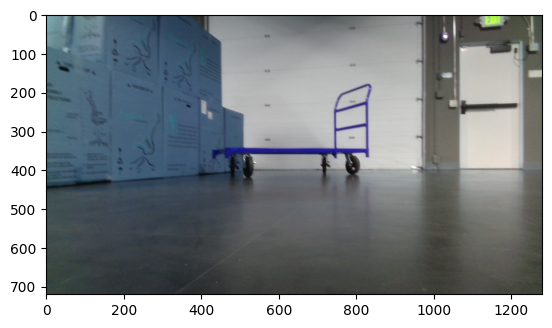

In [4]:
plt.imshow(img)

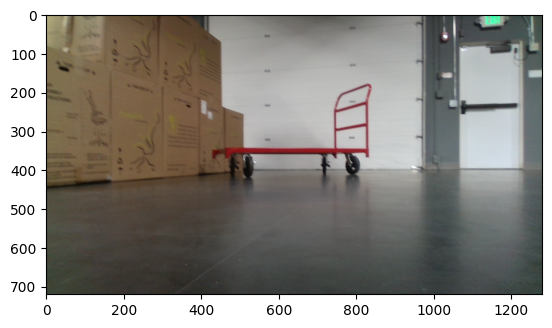

In [5]:
# Convert the image from BGR to RGB format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [6]:
directory = '/content/sample_dataset/sample_dataset/images/'
file_list = os.listdir(directory)
file_list

['training_images_take_7_387.png',
 'training_images_take_7_429.png',
 'training_images_take_7_468.png',
 'training_images_take_7_290.png',
 'training_images_take_7_326.png',
 'training_images_take_7_348.png',
 'training_images_take_7_298.png',
 'training_images_take_7_406.png',
 'training_images_take_7_355.png',
 'training_images_take_7_304.png',
 'training_images_take_7_431.png',
 'training_images_take_7_316.png',
 'training_images_take_7_283.png',
 'training_images_take_7_491.png',
 'training_images_take_7_407.png',
 'training_images_take_7_466.png',
 'training_images_take_7_427.png',
 'training_images_take_7_288.png',
 'training_images_take_7_440.png',
 'training_images_take_7_293.png',
 'training_images_take_7_461.png',
 'training_images_take_7_411.png',
 'training_images_take_7_322.png',
 'training_images_take_7_403.png',
 'training_images_take_7_402.png',
 'training_images_take_7_317.png',
 'training_images_take_7_356.png',
 'training_images_take_7_373.png',
 'training_images_ta

In [7]:
len(file_list)

200

In [8]:
def extract_coordinates(json_string):

  data = json_string

  coordinates = []
  for obj in data:
    if "ObjectClassName" in obj and "Left" in obj and "Top" in obj and "Right" in obj and "Bottom" in obj:
      objectClassName = obj["ObjectClassName"]
      left = obj["Left"]
      top = obj["Top"]
      right = obj["Right"]
      bottom = obj["Bottom"]
      coordinates.append({"ObjectClassName": objectClassName, "Left": left, "Top": top, "Right": right, "Bottom": bottom})

  return coordinates


In [9]:
json_path = r'/content/sample_dataset/sample_dataset/labels/json/training_images_take_7_279.json'
with open(json_path, 'rb') as f:
  json_string = json.load(f)

In [10]:
print(json_string)

[{'Id': 0, 'ObjectClassName': 'Wheel', 'ObjectClassId': 1, 'Left': 505, 'Top': 363, 'Right': 544, 'Bottom': 422, 'Confidence': None, 'SourceModel': None, 'Prediction': None, 'PredictionClass': None}, {'Id': 1, 'ObjectClassName': 'Wheel', 'ObjectClassId': 1, 'Left': 470, 'Top': 366, 'Right': 500, 'Bottom': 418, 'Confidence': None, 'SourceModel': None, 'Prediction': None, 'PredictionClass': None}, {'Id': 2, 'ObjectClassName': 'Wheel', 'ObjectClassId': 1, 'Left': 707, 'Top': 366, 'Right': 735, 'Bottom': 414, 'Confidence': None, 'SourceModel': None, 'Prediction': None, 'PredictionClass': None}, {'Id': 3, 'ObjectClassName': 'Wheel', 'ObjectClassId': 1, 'Left': 770, 'Top': 361, 'Right': 813, 'Bottom': 415, 'Confidence': None, 'SourceModel': None, 'Prediction': None, 'PredictionClass': None}, {'Id': 4, 'ObjectClassName': 'Dolly', 'ObjectClassId': 0, 'Left': 420, 'Top': 172, 'Right': 848, 'Bottom': 428, 'Confidence': None, 'SourceModel': None, 'Prediction': None, 'PredictionClass': None}]


In [11]:
coord = extract_coordinates(json_string)
coord

[{'ObjectClassName': 'Wheel',
  'Left': 505,
  'Top': 363,
  'Right': 544,
  'Bottom': 422},
 {'ObjectClassName': 'Wheel',
  'Left': 470,
  'Top': 366,
  'Right': 500,
  'Bottom': 418},
 {'ObjectClassName': 'Wheel',
  'Left': 707,
  'Top': 366,
  'Right': 735,
  'Bottom': 414},
 {'ObjectClassName': 'Wheel',
  'Left': 770,
  'Top': 361,
  'Right': 813,
  'Bottom': 415},
 {'ObjectClassName': 'Dolly',
  'Left': 420,
  'Top': 172,
  'Right': 848,
  'Bottom': 428}]

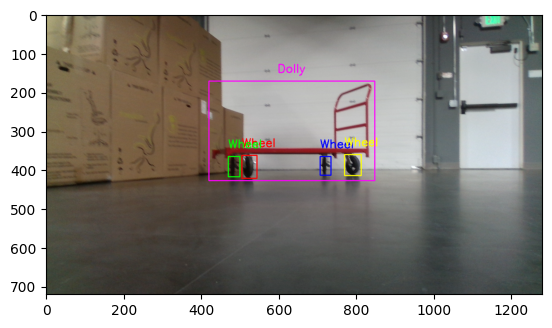

In [12]:
img = cv2.imread('/content/sample_dataset/sample_dataset/images/training_images_take_7_279.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255)]

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_thickness = 2

# drow rectangles 
for i, bbox in enumerate(coord):
  color = colors[i % len(colors)]
  left, top, right, bottom = bbox['Left'], bbox['Top'], bbox['Right'], bbox['Bottom']
  objectClassName = bbox['ObjectClassName']
  cv2.rectangle(img_rgb, (left, top), (right, bottom), color, thickness=2)
  (text_width, text_height), _ = cv2.getTextSize(objectClassName, font, font_scale, font_thickness)
  text_left = max(left, left + (right - left) // 2 - text_width // 2)
  cv2.putText(img_rgb, objectClassName, (text_left, top - text_height), font, font_scale, color, font_thickness)

plt.imshow(img_rgb)
plt.show()

In [13]:
def get_label_path(image_path, format='json'):
  base_path = os.path.dirname(os.path.dirname(image_path))
  image_filename = os.path.basename(image_path)
  image_name, _ = os.path.splitext(image_filename)
  label_filename = f"{image_name}.{format}"
  label_path = os.path.join(base_path, "labels", format, label_filename)
  return label_path

image_path = "sample_dataset/sample_dataset/images/training_images_take_7_279.png"
label_path = get_label_path(image_path)
print(label_path)

sample_dataset/sample_dataset/labels/json/training_images_take_7_279.json


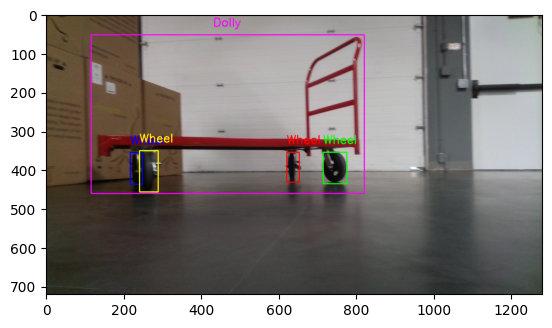

In [14]:
# summarizing all the results in one function:
def plot_labels(image_path):

  json_path = get_label_path(image_path)

  with open(json_path, 'rb') as f:
    json_string = json.load(f)

  coord = extract_coordinates(json_string)
  img = cv2.imread(image_path)

  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255)]

  font = cv2.FONT_HERSHEY_SIMPLEX
  font_scale = 1
  font_thickness = 2

  # drow rectangles 
  for i, bbox in enumerate(coord):
    color = colors[i % len(colors)]
    left, top, right, bottom = bbox['Left'], bbox['Top'], bbox['Right'], bbox['Bottom']
    objectClassName = bbox['ObjectClassName']
    cv2.rectangle(img_rgb, (left, top), (right, bottom), color, thickness=2)
    (text_width, text_height), _ = cv2.getTextSize(objectClassName, font, font_scale, font_thickness)
    text_left = max(left, left + (right - left) // 2 - text_width // 2)
    cv2.putText(img_rgb, objectClassName, (text_left, top - text_height), font, font_scale, color, font_thickness)

  plt.imshow(img_rgb)
  plt.show()

plot_labels('/content/sample_dataset/sample_dataset/images/training_images_take_7_358.png')

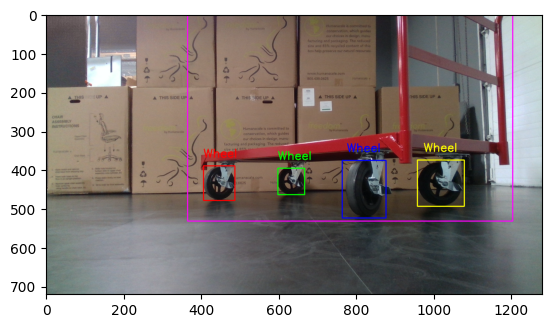

In [15]:
plot_labels('/content/sample_dataset/sample_dataset/images/training_images_take_7_484.png')

In [16]:
class LabelImage:
  def __init__(self, img_path):
    self.img_path = img_path


  def extract_coordinates(self, data):
    coordinates = []
    for obj in data:
      if "ObjectClassName" in obj and "Left" in obj and "Top" in obj and "Right" in obj and "Bottom" in obj:
        objectClassName = obj["ObjectClassName"]
        left = obj["Left"]
        top = obj["Top"]
        right = obj["Right"]
        bottom = obj["Bottom"]
        coordinates.append({"ObjectClassName": objectClassName, "Left": left, "Top": top, "Right": right, "Bottom": bottom})
    return coordinates  


  def get_label_path(self):
    base_path = os.path.dirname(os.path.dirname(self.img_path))
    image_filename = os.path.basename(self.img_path)
    image_name, _ = os.path.splitext(image_filename)
    label_filename = f"{image_name}.json"
    label_path = os.path.join(base_path, "labels", "json", label_filename)
    return label_path


  def plot_labels(self):
    json_path = self.get_label_path()
    with open(json_path, 'rb') as f:
      json_string = json.load(f)

    coord = self.extract_coordinates(json_string)
    img = cv2.imread(self.img_path)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255)]
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 2

    # drow rectangles 
    for i, bbox in enumerate(coord):
      color = colors[i % len(colors)]
      left, top, right, bottom = bbox['Left'], bbox['Top'], bbox['Right'], bbox['Bottom']
      objectClassName = bbox['ObjectClassName']
      cv2.rectangle(img_rgb, (left, top), (right, bottom), color, thickness=2)
      (text_width, text_height), _ = cv2.getTextSize(objectClassName, font, font_scale, font_thickness)
      text_left = max(left, left + (right - left) // 2 - text_width // 2)
      cv2.putText(img_rgb, objectClassName, (text_left, top - text_height), font, font_scale, color, font_thickness)

    plt.imshow(img_rgb)
    plt.show()

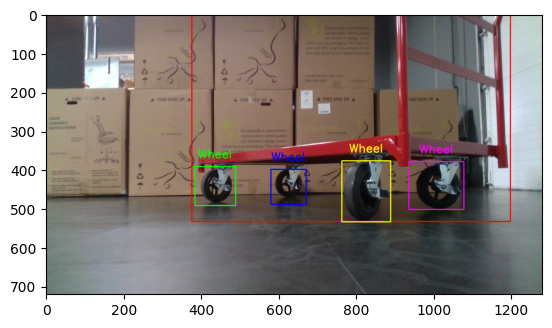

In [17]:
label_image1 = LabelImage('/content/sample_dataset/sample_dataset/images/training_images_take_7_485.png')
label_image1.plot_labels()

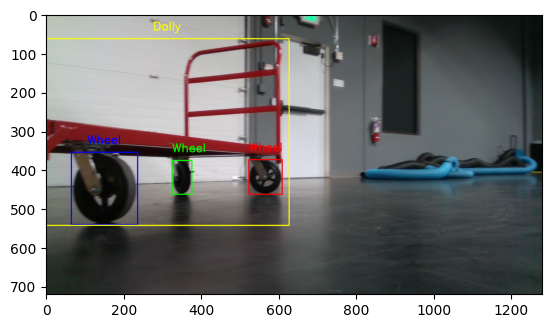

In [18]:
label_image2 = LabelImage('/content/sample_dataset/sample_dataset/images/training_images_take_7_420.png')
label_image2.plot_labels()

## data augmentation

In [19]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
rotationRange=20
widthShiftRange = 0.1
heightShiftRange = 0.1
zoomRange = [0.2, 1.5]
datagen = ImageDataGenerator(
    rotation_range=rotationRange,
    width_shift_range=widthShiftRange,
    height_shift_range=heightShiftRange,
    zoom_range=zoomRange,
    horizontal_flip=True
)


In [20]:
def show_examples(it):

  pyplot.figure(figsize=(15,10))

  for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint32')
    pyplot.imshow(image)
  pyplot.show()

training_images_take_7_387.png


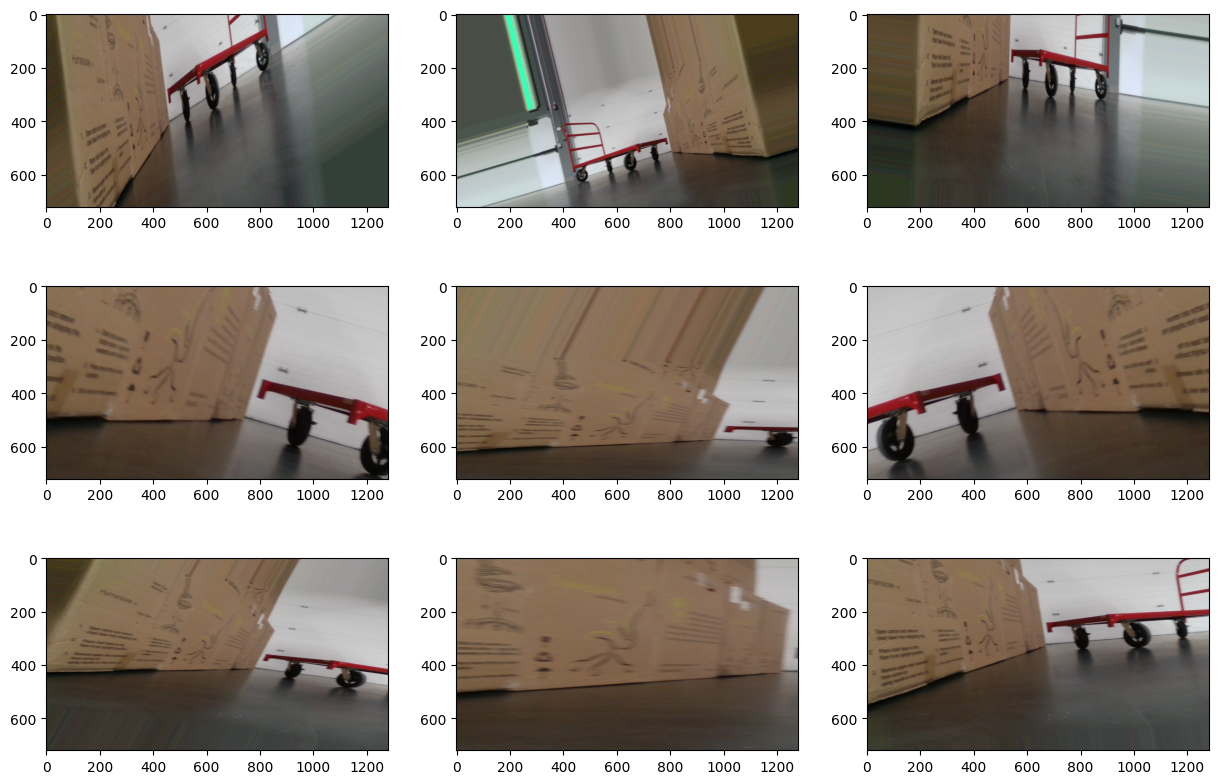

In [21]:
input_dir = r'/content/sample_dataset/sample_dataset/images'
output_dir = r'/content/sample_dataset/sample_dataset/generated/images'

list_images = os.listdir(input_dir)
img = load_img(os.path.join(input_dir, list_images[0]))
print(list_images[0])
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix=list_images[0][:-4], save_format='png')
it = datagen.flow(x, batch_size=1)
show_examples(it)

In [22]:
print(get_label_path(os.path.join(input_dir, list_images[0])))

/content/sample_dataset/sample_dataset/labels/json/training_images_take_7_387.json


#### So doing data augmentation with keras is good for object detection and image classification, but for object multi-classification its really hard to augmente images and augmente the corresponding label at the same time.

#### so i will try to use imgaug library 
#### you can check the tutorial here: https://imgaug.readthedocs.io/en/latest/source/examples_bounding_boxes.html

In [23]:

# # Load the JSON data
# with open("/content/sample_dataset/sample_dataset/labels/json/training_images_take_7_279.json", "rb") as f:
#   data = json.load(f)

# # Load the image
# image_path = "/content/sample_dataset/sample_dataset/images/training_images_take_7_279.png"
# image = cv2.imread(image_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# # Extract bounding boxes from JSON data
# bboxes = []
# for item in data:
#   if item["ObjectClassName"] == "Wheel" or item["ObjectClassName"] == "Dolly":
#     bboxes.append(BoundingBox(x1=item["Left"], y1=item["Top"], x2=item["Right"], y2=item["Bottom"]))

# # Create imgaug's BoundingBoxesOnImage object
# bbs = BoundingBoxesOnImage(bboxes, shape=image.shape)



# # Define the augmentation pipeline
# seq = iaa.Sequential([
#     iaa.Fliplr(0.5), # Horizontally flip 50% of the images
#     iaa.Flipud(0.5), # vertic flip 50% of the images
#     iaa.Affine(rotate=(-20, 20), scale=(0.2, 1.2)),
#     iaa.AverageBlur(k=(2, 7)) # blur
# ])

# # Perform data augmentation
# image_aug, bbs_aug = seq(image=image, bounding_boxes=bbs)

# # Save the augmented image
# cv2.imwrite("/content/sample_dataset/sample_dataset/augmented_images/try.png", cv2.cvtColor(image_aug, cv2.COLOR_RGB2BGR))


# # Update the JSON data with the new bounding box coordinates
# for item, bb in zip(data, bbs_aug.bounding_boxes):
#   item["Left"], item["Top"], item["Right"], item["Bottom"] = int(bb.x1), int(bb.y1), int(bb.x2), int(bb.y2)

# # Save the updated JSON data
# with open("/content/sample_dataset/sample_dataset/augmented_labels/try.json", "w") as f:
#   json.dump(data, f, indent=4)

In [24]:
# json_path = r'/content/sample_dataset/sample_dataset/augmented_labels/try.json'
# with open(json_path, 'rb') as f:
#   json_string = json.load(f)
# print(json_string)
# coord = extract_coordinates(json_string)

# img = cv2.imread('/content/sample_dataset/sample_dataset/augmented_images/try.png')

# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255)]

# font = cv2.FONT_HERSHEY_SIMPLEX
# font_scale = 1
# font_thickness = 2

# # drow rectangles 
# for i, bbox in enumerate(coord):
#   color = colors[i % len(colors)]
#   left, top, right, bottom = bbox['Left'], bbox['Top'], bbox['Right'], bbox['Bottom']
#   objectClassName = bbox['ObjectClassName']
#   cv2.rectangle(img_rgb, (left, top), (right, bottom), color, thickness=2)
#   (text_width, text_height), _ = cv2.getTextSize(objectClassName, font, font_scale, font_thickness)
#   text_left = max(left, left + (right - left) // 2 - text_width // 2)
#   cv2.putText(img_rgb, objectClassName, (text_left, top - text_height), font, font_scale, color, font_thickness)

# plt.imshow(img_rgb)
# plt.show()

In [25]:
def image_augmentation(images_path_dir, image_destination_path, json_destination_path, iteration = 1):
  for filename in os.listdir(images_path_dir):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
      # Load the image
      image_path = os.path.join(images_path_dir, filename)
      image = cv2.imread(image_path)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


      # Load the JSON data
      label_path = get_label_path(image_path)
      with open(label_path, "rb") as f:
        data = json.load(f)


      # Extract bounding boxes from JSON data
      bboxes = []
      for item in data:
        if item["ObjectClassName"] == "Wheel" or item["ObjectClassName"] == "Dolly":
          bboxes.append(BoundingBox(x1=item["Left"], y1=item["Top"], x2=item["Right"], y2=item["Bottom"]))

      # Create imgaug's BoundingBoxesOnImage object
      bbs = BoundingBoxesOnImage(bboxes, shape=image.shape)

      # Define the augmentation pipeline
      seq = iaa.Sequential([
          iaa.Fliplr(0.5), # Horizontally flip 50% of the images
          iaa.Flipud(0.5), # vertic flip 50% of the images
          iaa.Affine(rotate=(-20, 20), scale=(0.2, 1.2)),
          iaa.AverageBlur(k=(2, 7)) # blur
      ])
    for i in range(iteration):
      # Perform data augmentation
      image_aug, bbs_aug = seq(image=image, bounding_boxes=bbs)

      # Save the augmented image
      name_toAdd = '_aug' + str(iteration) + '_' + str(i)
      destination_filename = os.path.splitext(os.path.basename(filename))[0] + name_toAdd + '.png'
      cv2.imwrite(os.path.join(image_destination_path, destination_filename), cv2.cvtColor(image_aug, cv2.COLOR_RGB2BGR))


      # Update the JSON data with the new bounding box coordinates
      for item, bb in zip(data, bbs_aug.bounding_boxes):
        item["Left"], item["Top"], item["Right"], item["Bottom"] = int(bb.x1), int(bb.y1), int(bb.x2), int(bb.y2)

      # Save the updated JSON data
      destination_filename = os.path.splitext(os.path.basename(filename))[0] + name_toAdd + '.json'
      json_toWrite = os.path.join(json_destination_path, destination_filename)
      with open(json_toWrite, "w") as f:
        json.dump(data, f, indent=4)


In [26]:
image_augmentation('/content/sample_dataset/sample_dataset/images',
                    '/content/sample_dataset/sample_dataset/images',
                    '/content/sample_dataset/sample_dataset/labels/json', 2)  # i to help naming the image name

[{'Id': 0, 'ObjectClassName': 'Wheel', 'ObjectClassId': 1, 'Left': 568, 'Top': 319, 'Right': 592, 'Bottom': 352, 'Confidence': None, 'SourceModel': None, 'Prediction': None, 'PredictionClass': None}, {'Id': 1, 'ObjectClassName': 'Wheel', 'ObjectClassId': 1, 'Left': 549, 'Top': 319, 'Right': 568, 'Bottom': 348, 'Confidence': None, 'SourceModel': None, 'Prediction': None, 'PredictionClass': None}, {'Id': 2, 'ObjectClassName': 'Wheel', 'ObjectClassId': 1, 'Left': 676, 'Top': 334, 'Right': 693, 'Bottom': 362, 'Confidence': None, 'SourceModel': None, 'Prediction': None, 'PredictionClass': None}, {'Id': 3, 'ObjectClassName': 'Wheel', 'ObjectClassId': 1, 'Left': 709, 'Top': 338, 'Right': 735, 'Bottom': 369, 'Confidence': None, 'SourceModel': None, 'Prediction': None, 'PredictionClass': None}, {'Id': 4, 'ObjectClassName': 'Dolly', 'ObjectClassId': 0, 'Left': 511, 'Top': 311, 'Right': 755, 'Bottom': 472, 'Confidence': None, 'SourceModel': None, 'Prediction': None, 'PredictionClass': None}]


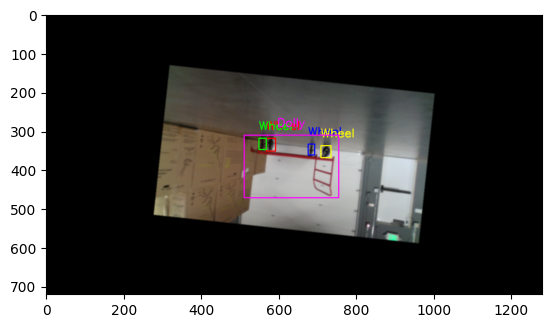

In [27]:
json_path = r'/content/sample_dataset/sample_dataset/labels/json/training_images_take_7_279_aug2_0.json'
with open(json_path, 'rb') as f:
  json_string = json.load(f)
print(json_string)
coord = extract_coordinates(json_string)

img = cv2.imread('/content/sample_dataset/sample_dataset/images/training_images_take_7_279_aug2_0.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255)]

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_thickness = 2

# drow rectangles 
for i, bbox in enumerate(coord):
  color = colors[i % len(colors)]
  left, top, right, bottom = bbox['Left'], bbox['Top'], bbox['Right'], bbox['Bottom']
  objectClassName = bbox['ObjectClassName']
  cv2.rectangle(img_rgb, (left, top), (right, bottom), color, thickness=2)
  (text_width, text_height), _ = cv2.getTextSize(objectClassName, font, font_scale, font_thickness)
  text_left = max(left, left + (right - left) // 2 - text_width // 2)
  cv2.putText(img_rgb, objectClassName, (text_left, top - text_height), font, font_scale, color, font_thickness)

plt.imshow(img_rgb)
plt.show()

## Train Test Split

In [28]:
dataset_dir = r'/content/sample_dataset/sample_dataset/images'
label_dir = r'/content/sample_dataset/sample_dataset/labels/json'

image_filenames = os.listdir(dataset_dir)
label_filenames = []

for image in image_filenames:
  label_filenames.append(os.path.basename(get_label_path(os.path.join(dataset_dir, image))))

print(image_filenames)
print(label_filenames)

train_image, test_image, train_label, test_label = train_test_split(image_filenames, label_filenames, test_size=0.2, random_state=42)



['training_images_take_7_368_aug2_0.png', 'training_images_take_7_387.png', 'training_images_take_7_385_aug2_1.png', 'training_images_take_7_333_aug2_0.png', 'training_images_take_7_377_aug2_0.png', 'training_images_take_7_491_aug2_1.png', 'training_images_take_7_313_aug2_0.png', 'training_images_take_7_429.png', 'training_images_take_7_468.png', 'training_images_take_7_290.png', 'training_images_take_7_315_aug2_0.png', 'training_images_take_7_317_aug2_0.png', 'training_images_take_7_326.png', 'training_images_take_7_280_aug2_0.png', 'training_images_take_7_356_aug2_0.png', 'training_images_take_7_348.png', 'training_images_take_7_341_aug2_1.png', 'training_images_take_7_298.png', 'training_images_take_7_351_aug2_0.png', 'training_images_take_7_384_aug2_1.png', 'training_images_take_7_304_aug2_0.png', 'training_images_take_7_430_aug2_0.png', 'training_images_take_7_482_aug2_1.png', 'training_images_take_7_283_aug2_1.png', 'training_images_take_7_355_aug2_1.png', 'training_images_take_7

In [29]:
print(f'Training images: {len(train_image)}')
print(f'Training Labels: {len(train_label)}')
print(f'Test images: {len(test_image)}')
print(f'Test Labels: {len(test_label)}')

Training images: 480
Training Labels: 480
Test images: 120
Test Labels: 120


In [30]:
print(f'"train_image[0]" = {train_image[0]}, "train_label[0]" = {train_label[0]}')

"train_image[0]" = training_images_take_7_412.png, "train_label[0]" = training_images_take_7_412.json


# Training on YOLOv5

##### we need to convert our labels to .txt files instead of json

In [31]:
def normalize_labels(json_path, new_folder_path):
  with open(json_path, 'rb') as f:
    annotations = json.load(f)

  # annotations = json.loads(json_string)

  # all the images are 1280 x 720 
  image_width = 1280
  image_height = 720

  output_lines = []

  for annotation in annotations:
    class_id = annotation["ObjectClassId"]
    left = annotation["Left"]
    top = annotation["Top"]
    right = annotation["Right"]
    bottom = annotation["Bottom"]

    # normalizing the labels data (between 0 and 1)
    x_center = (left + right) / (2 * image_width) 
    y_center = (top + bottom) / (2 * image_height)
    width = (right - left) / image_width
    height = (bottom - top) / image_height

    output_line = f"{class_id} {x_center} {y_center} {width:} {height:}"
    output_lines.append(output_line)

  json_basename = f"{os.path.splitext(os.path.basename(json_path))[0]}.txt"
  
  

  output_filename =  os.path.join(new_folder_path, json_basename)
  with open(output_filename, "w") as output_file:
    output_file.write("\n".join(output_lines))


In [32]:
new_folder_path = r'/content/sample_dataset/sample_dataset/labels/txt'

if not os.path.exists(new_folder_path):
  os.makedirs(new_folder_path)

normalize_labels('/content/sample_dataset/sample_dataset/labels/json/training_images_take_7_282.json', new_folder_path)

In [33]:
# from PIL import Image

# # Open image using Image module
# im = Image.open("/content/yolov5/data/BMW_dataset/images/train/training_images_take_7_341_aug0_73_aug1_186_aug2_455.png")

# # Get the size of the image in pixels
# width, height = im.size

# # Print the size of the image
# print("Image size (width x height): {} x {}".format(width, height))

### this will generate all the txt files to use it in YOLOv5

In [34]:
new_folder_path = r'/content/sample_dataset/sample_dataset/labels/txt'

if not os.path.exists(new_folder_path):
  os.makedirs(new_folder_path)


label_dir = r'/content/sample_dataset/sample_dataset/labels/json'

labels_path = os.listdir(label_dir)
i=0
for label in labels_path:
  i+=1
  if i%20 == 0:
    print(i,end=" ") # check the process
  label_path = os.path.join('/content/sample_dataset/sample_dataset/labels/json', label)
  if os.path.isfile(label_path):
    normalize_labels(label_path, new_folder_path)

20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340 360 380 400 420 440 460 480 500 520 540 560 580 600 

In [35]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.8/78.2 GB disk)


## 1. Detect

In [36]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 50.0MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 89.5ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 103.9ms
Speed: 0.6ms pre-process, 96.7ms inference, 162.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/

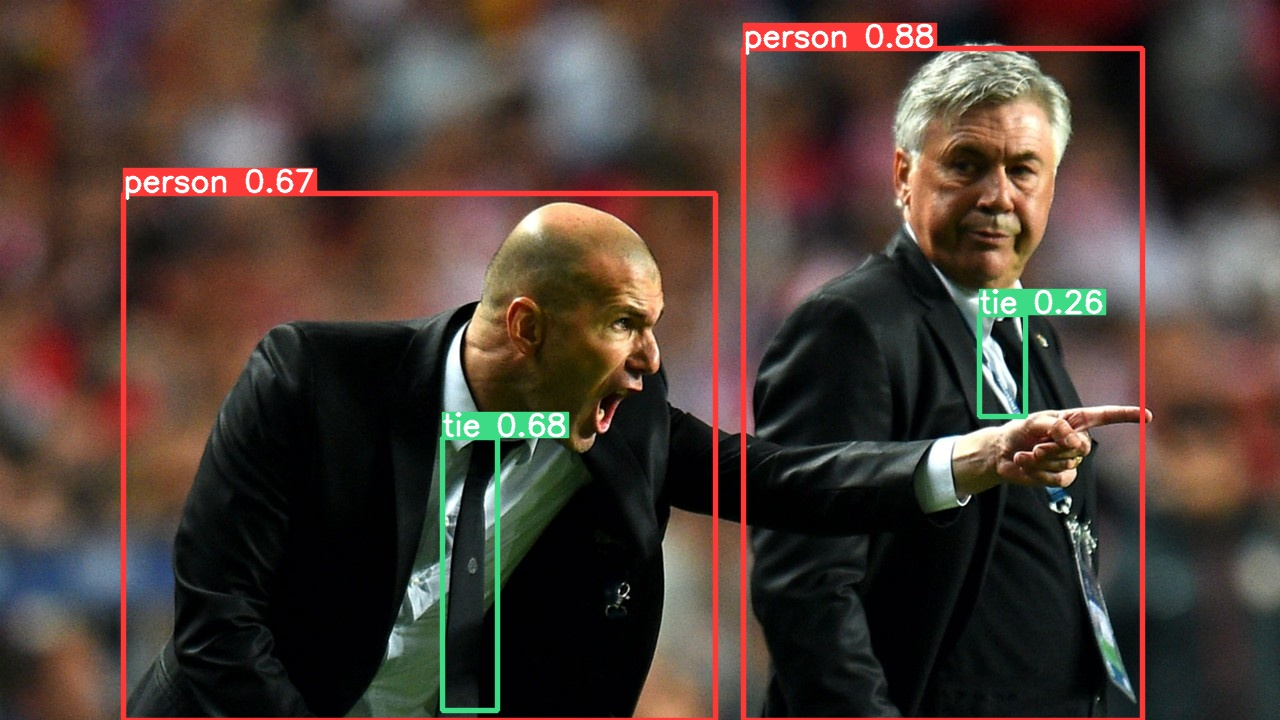

In [37]:
display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

#### after setting yolov5 we need to copy our dataset into /data/ in yolo repository
#### after we need to cread .yaml file to configure our data 

In [38]:
# creating dataset file for YOLO splited into train&val
new_folder_path = r'/content/yolov5/data/'

directories = ['BMW_dataset/images/train', 'BMW_dataset/images/val', 'BMW_dataset/labels/train', 'BMW_dataset/labels/val']


for directory in directories:
  new_dir_path = os.path.join(new_folder_path, directory)
  if not os.path.exists(new_dir_path):
    os.makedirs(new_dir_path)

In [39]:
# splitting dataset but now for txt not json

dataset_dir = r'/content/sample_dataset/sample_dataset/images'
label_dir = r'/content/sample_dataset/sample_dataset/labels/txt'

image_filenames = os.listdir(dataset_dir)
label_filenames = []

for image in image_filenames:
  label_filenames.append(os.path.basename(get_label_path(os.path.join(dataset_dir, image), 'txt')))

print(image_filenames)
print(label_filenames)

train_image, val_image, train_label, val_label = train_test_split(image_filenames, label_filenames, test_size=0.2, random_state=42)



['training_images_take_7_368_aug2_0.png', 'training_images_take_7_387.png', 'training_images_take_7_385_aug2_1.png', 'training_images_take_7_333_aug2_0.png', 'training_images_take_7_377_aug2_0.png', 'training_images_take_7_491_aug2_1.png', 'training_images_take_7_313_aug2_0.png', 'training_images_take_7_429.png', 'training_images_take_7_468.png', 'training_images_take_7_290.png', 'training_images_take_7_315_aug2_0.png', 'training_images_take_7_317_aug2_0.png', 'training_images_take_7_326.png', 'training_images_take_7_280_aug2_0.png', 'training_images_take_7_356_aug2_0.png', 'training_images_take_7_348.png', 'training_images_take_7_341_aug2_1.png', 'training_images_take_7_298.png', 'training_images_take_7_351_aug2_0.png', 'training_images_take_7_384_aug2_1.png', 'training_images_take_7_304_aug2_0.png', 'training_images_take_7_430_aug2_0.png', 'training_images_take_7_482_aug2_1.png', 'training_images_take_7_283_aug2_1.png', 'training_images_take_7_355_aug2_1.png', 'training_images_take_7

In [40]:
# now we need to add splited data in train and val

# train_image, val_image, train_label, val_label

src_dir = '/content/sample_dataset/sample_dataset/images'
dest_dir = '/content/yolov5/data/BMW_dataset/images/train'

# copy images for train_image using shutil:
for filename in os.listdir('/content/sample_dataset/sample_dataset/images'):
  if filename in train_image:
    # Create the full path for the source and destination files
    src_path = os.path.join(src_dir, filename)
    dest_path = os.path.join(dest_dir, filename)
    # Copy the file to the destination directory
    shutil.copy(src_path, dest_path)

#same for validation:

src_dir = '/content/sample_dataset/sample_dataset/images'
dest_dir = '/content/yolov5/data/BMW_dataset/images/val'

# copy images for test_image using shutil:
for filename in os.listdir('/content/sample_dataset/sample_dataset/images'):
  if filename in val_image:
    # Create the full path for the source and destination files
    src_path = os.path.join(src_dir, filename)
    dest_path = os.path.join(dest_dir, filename)
    # Copy the file to the destination directory
    shutil.copy(src_path, dest_path)

In [41]:
print(f"train data len : {len(os.listdir('/content/yolov5/data/BMW_dataset/images/train'))}")
print(f"val data len : {len(os.listdir('/content/yolov5/data/BMW_dataset/images/val'))}")

train data len : 480
val data len : 120


In [42]:
# we do the same for labels data
# train_image, val_image, train_label, val_label


src_dir = '/content/sample_dataset/sample_dataset/labels/txt'
dest_dir = '/content/yolov5/data/BMW_dataset/labels/train'

# copy images for train_image using shutil:
for filename in os.listdir('/content/sample_dataset/sample_dataset/labels/txt'):
  if filename in train_label:
    # Create the full path for the source and destination files
    src_path = os.path.join(src_dir, filename)
    dest_path = os.path.join(dest_dir, filename)
    # Copy the file to the destination directory
    shutil.copy(src_path, dest_path)

#same for validation:

src_dir = '/content/sample_dataset/sample_dataset/labels/txt'
dest_dir = '/content/yolov5/data/BMW_dataset/labels/val'

# copy images for train_image using shutil:
for filename in os.listdir('/content/sample_dataset/sample_dataset/labels/txt'):
  if filename in val_label:
    # Create the full path for the source and destination files
    src_path = os.path.join(src_dir, filename)
    dest_path = os.path.join(dest_dir, filename)
    # Copy the file to the destination directory
    shutil.copy(src_path, dest_path)

In [43]:
print(f"train labels len : {len(os.listdir('/content/yolov5/data/BMW_dataset/labels/train'))}")
print(f"val labels len : {len(os.listdir('/content/yolov5/data/BMW_dataset/labels/val'))}")

train labels len : 480
val labels len : 120


In [44]:
# create new yaml file for configuration

new_file_path = r'/content/yolov5/data/BMW_dataset.yaml'

if not os.path.exists(new_file_path):

  with open(new_file_path, 'w') as f:
    f.write('# This is BMW dataset configuration File\n')
    f.write('train: data/BMW_dataset/images/train\n')
    f.write('val: data/BMW_dataset/images/val\n')
    f.write('nc: 2\n') 
    f.write("names: ['Dolly', 'Wheel']\n")

In [45]:
!python train.py --img 640 --batch 8 --epochs 16 --data BMW_dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=BMW_dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=16, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0

In [46]:
!cp /content/yolov5/data/BMW_dataset/images/val/training_images_take_7_280.png /content/yolov5/data/images

In [48]:
!python detect.py --weights runs/train/exp/weights/best.pt --conf 0.25 --source data/images

detect: weights=['runs/train/exp/weights/best.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/3 /content/yolov5/data/images/bus.jpg: 640x480 4 Wheels, 58.9ms
image 2/3 /content/yolov5/data/images/training_images_take_7_280.png: 384x640 1 Dolly, 4 Wheels, 67.8ms
image 3/3 /content/yolov5/data/images/zidane.jpg: 384x640 (no detections), 8.0ms
Speed: 0.5ms pre-process, 44.9ms 

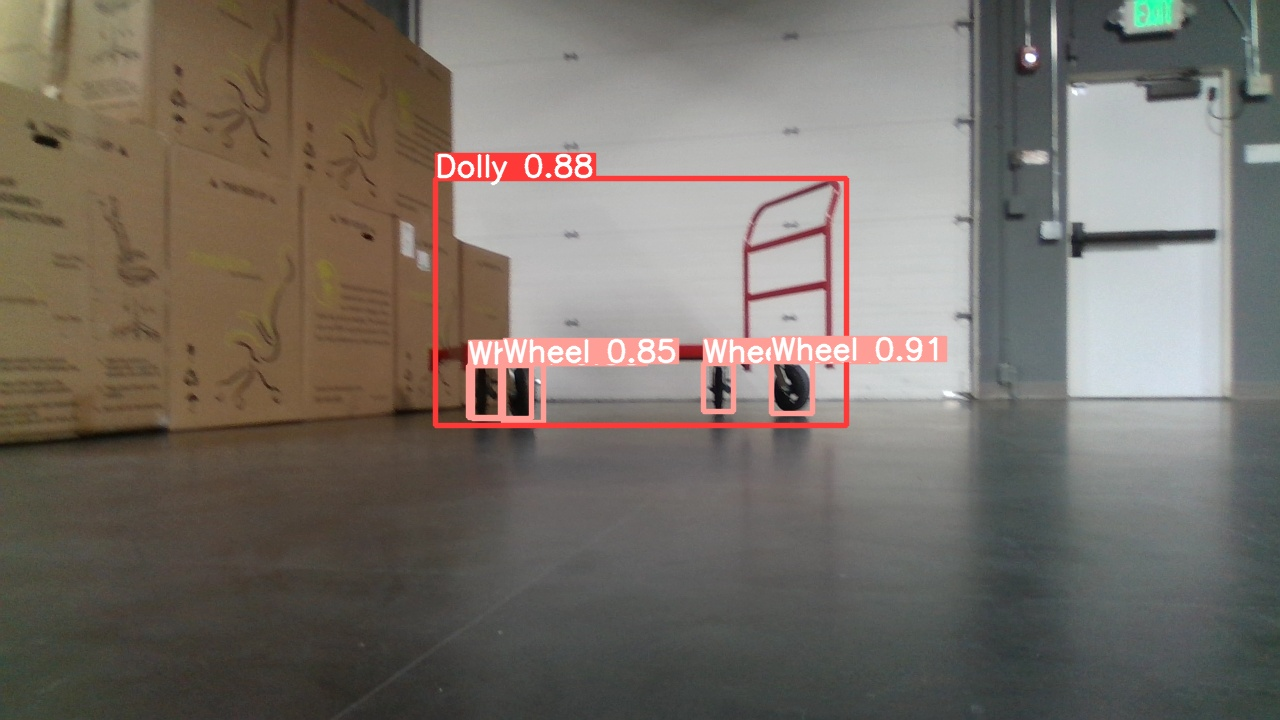

In [ ]:
display.Image(filename='runs/detect/exp2/training_images_take_7_279.jpg', width=600)


### Evaluate the current Model: (val.py)

In [49]:
!python val.py --data BMW_dataset.yaml --weights runs/train/exp/weights/best.pt --img 640


val: data=/content/yolov5/data/BMW_dataset.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/data/BMW_dataset/labels/val.cache... 120 images, 0 backgrounds, 1 corrupt: 100% 120/120 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/yolov5/data/BMW_dataset/images/val/training_images_take_7_489_aug2_0.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1514]
                 Class     Images  Instances          P  

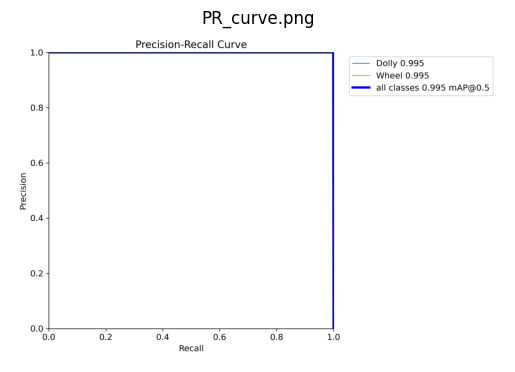

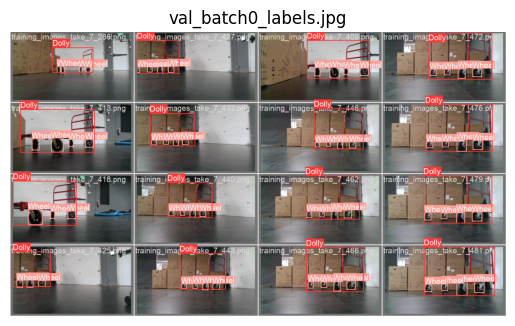

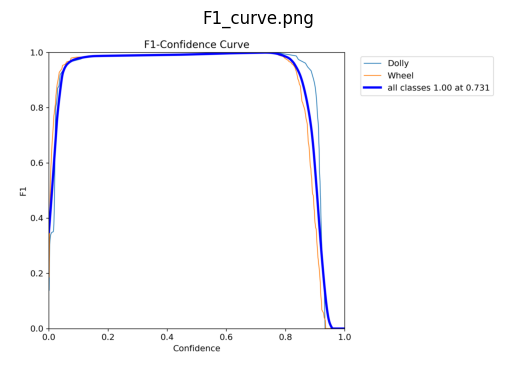

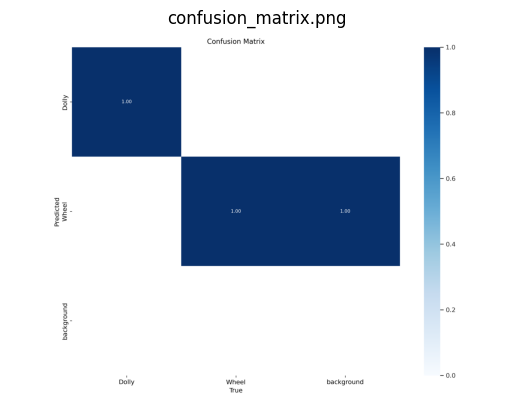

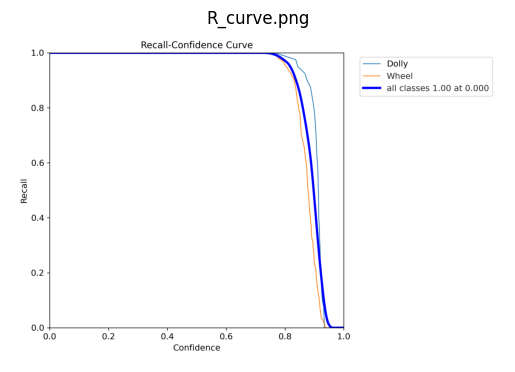

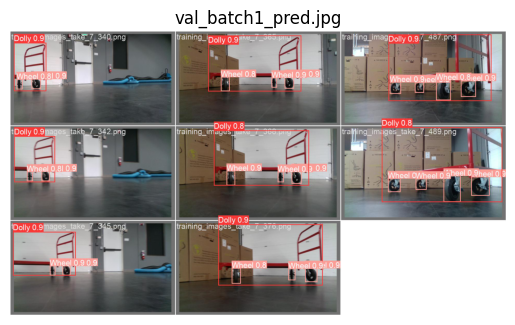

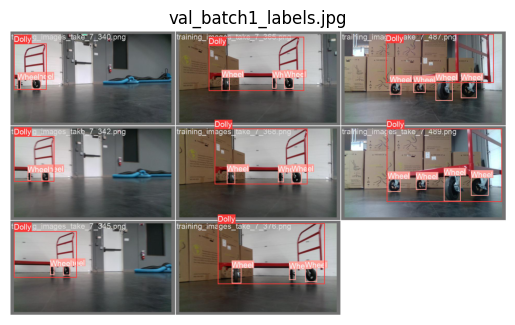

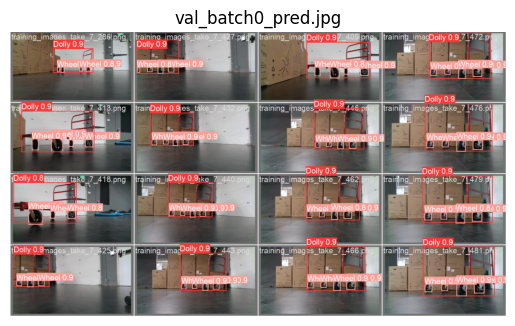

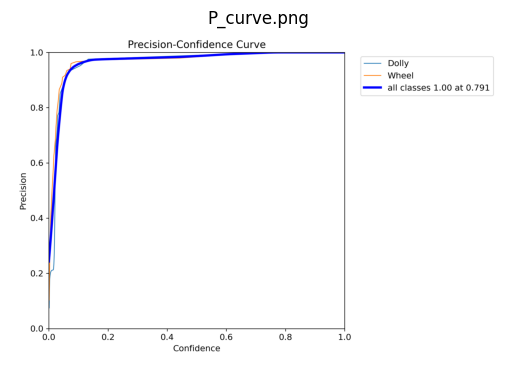

In [ ]:

val_exp2_path = "/content/yolov5/runs/val/exp2"
images = [img for img in os.listdir(val_exp2_path) if img.endswith(".jpg") or img.endswith(".png")]

for image_name in images:
    image_path = os.path.join(val_exp2_path, image_name)
    img = mpimg.imread(image_path)
    plt.figure()
    plt.title(image_name)
    plt.imshow(img)
    plt.axis("off")
    plt.show()


## relaunch the	training	with	different	hyperparameters	

In [50]:
# we can create a YAML file containing the hyperparameters in data/hyps
# the problem here is that we need to configure all that parameters 
# create new yaml file for hyps

# GO TO /content/yolov5/data/hyps/hyp.BMW_hyps1.yaml and paste the file from https://github.com/ultralytics/yolov5/discussions/7319


'''
 lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3) 
 lrf: 0.01  # final OneCycleLR learning rate (lr0 * lrf) 
 momentum: 0.937  # SGD momentum/Adam beta1 
 weight_decay: 0.0005  # optimizer weight decay 5e-4 
 warmup_epochs: 3.0  # warmup epochs (fractions ok) 
 warmup_momentum: 0.8  # warmup initial momentum 
 warmup_bias_lr: 0.1  # warmup initial bias lr 
 box: 0.05  # box loss gain 
 cls: 0.5  # cls loss gain 
 cls_pw: 1.0  # cls BCELoss positive_weight 
 obj: 1.0  # obj loss gain (scale with pixels) 
 obj_pw: 1.0  # obj BCELoss positive_weight 
 iou_t: 0.20  # IoU training threshold 
 anchor_t: 4.0  # anchor-multiple threshold 
 # anchors: 3  # anchors per output layer (0 to ignore) 
 fl_gamma: 0.0  # focal loss gamma (efficientDet default gamma=1.5) 
 hsv_h: 0.015  # image HSV-Hue augmentation (fraction) 
 hsv_s: 0.7  # image HSV-Saturation augmentation (fraction) 
 hsv_v: 0.4  # image HSV-Value augmentation (fraction) 
 degrees: 0.0  # image rotation (+/- deg) 
 translate: 0.1  # image translation (+/- fraction) 
 scale: 0.5  # image scale (+/- gain) 
 shear: 0.0  # image shear (+/- deg) 
 perspective: 0.0  # image perspective (+/- fraction), range 0-0.001 
 flipud: 0.0  # image flip up-down (probability) 
 fliplr: 0.5  # image flip left-right (probability) 
 mosaic: 1.0  # image mosaic (probability) 
 mixup: 0.0  # image mixup (probability) 
 copy_paste: 0.0  # segment copy-paste (probability) 
 '''

bmw_hyps = r'/content/yolov5/data/hyps/hyp.BMW_hyps1.yaml'

with open(bmw_hyps, 'w') as f:
  f.write("# There is alot of hyperparameteres to modify, check https://github.com/ultralytics/yolov5/discussions/7319 \n")


# i will not use hyperparameters for this training

In [51]:
!python train.py --img 640 --batch 16 --epochs 64 --data BMW_dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=BMW_dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=64, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=

In [66]:
!python detect.py --weights runs/train/exp2/weights/best.onnx --conf 0.6 --source data/images --save-txt

detect: weights=['runs/train/exp2/weights/best.onnx'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Loading runs/train/exp2/weights/best.onnx for ONNX Runtime inference...
image 1/3 /content/yolov5/data/images/bus.jpg: 640x640 2 Wheels, 15.8ms
image 2/3 /content/yolov5/data/images/training_images_take_7_280.png: 640x640 1 Dolly, 4 Wheels, 11.2ms
image 3/3 /content/yolov5/data/images/zidane.jpg: 640x640 2 Wheels, 8.8ms
Speed: 3.5ms pre-process, 11.9ms inference, 32.5ms NMS pe

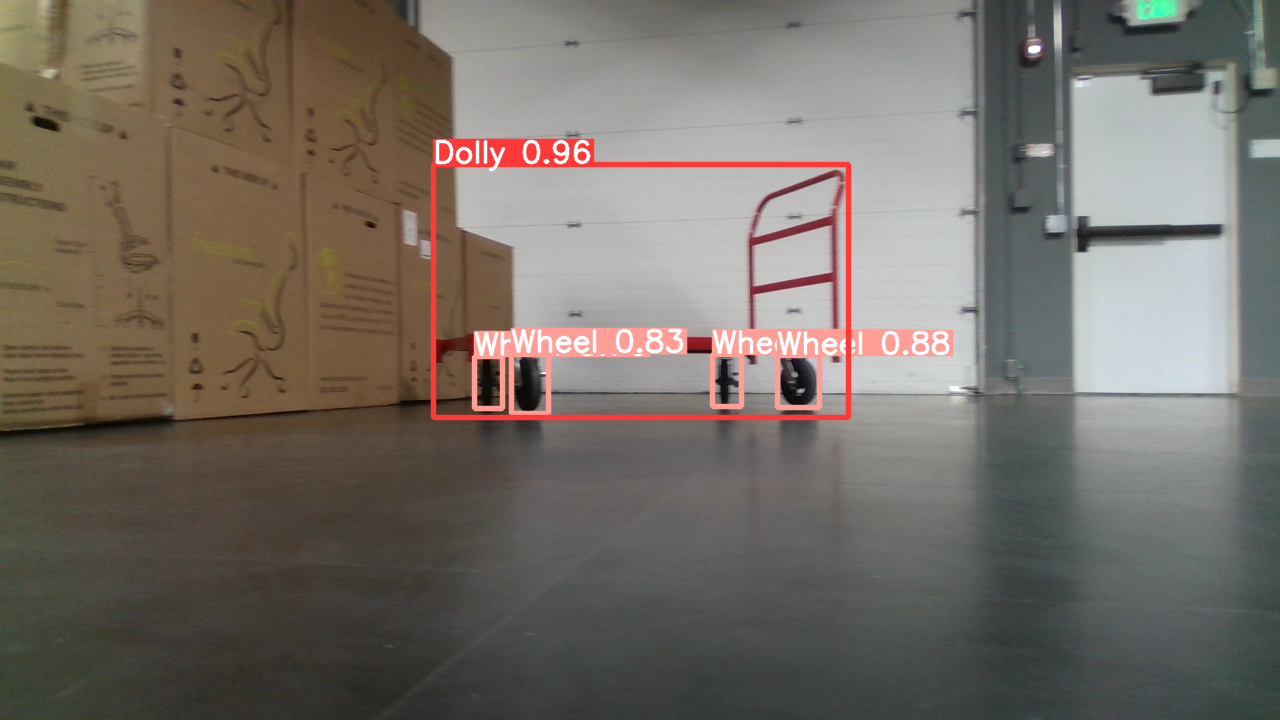

In [67]:
display.Image(filename='runs/detect/exp7/training_images_take_7_280.png', width=600)


In [61]:
!python export.py --weights runs/train/exp2/weights/best.pt --img 640 --batch 1 --opset 12 --dynamic --simplify --include onnx



export: data=data/coco128.yaml, weights=['runs/train/exp2/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=True, simplify=True, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/exp2/weights/best.pt with output shape (1, 25200, 7) (13.7 MB)

ONNX: starting export with onnx 1.13.1...
============= Diagnostic Run torch.onnx.export version 2.0.0+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: simplifying with onnx-simplifier 0.4.19...
ONNX: export success ✅ 3.6s, saved as runs/train/exp2/weights/best.onnx (26.8 MB)

Expor

## Trying MobileNet with **tensorflow**

In [47]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet

# load imagenet from tensorflow
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in mobilenet.layers:
    layer.trainable = False

x = mobilenet.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x) # since we are working with only two classes

model = tf.keras.models.Model(inputs=mobilenet.input, outputs=predictions)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [48]:
from sklearn.preprocessing import LabelBinarizer


images_dir = '/content/sample_dataset/sample_dataset/images'
labels_dir = '/content/sample_dataset/sample_dataset/labels/txt'

def load_data(images_dir, labels_dir):
    images = []
    labels = []

    # Read image file names and sort them
    image_files = sorted(os.listdir(images_dir))
    label_files = sorted(os.listdir(labels_dir))

    # Read labels from files and store them in a list
    for label_file in label_files:
        with open(os.path.join(labels_dir, label_file), 'r') as f:
            label_data = f.readline().strip().split()
            labels.append(int(label_data[0]))  # Assuming the class label is an integer

    # Read, resize and store images in a list
    for image_file in image_files:
        image = cv2.imread(os.path.join(images_dir, image_file))
        image = cv2.resize(image, (224, 224))
        images.append(image)

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # One-hot encode the labels
    lb = LabelBinarizer()
    labels = lb.fit_transform(labels)

    return images, labels


X, y = load_data(images_dir, labels_dir)
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2)


Epoch 1/10
15/15 [==============================] - 12s 144ms/step - loss: 0.7214 - accuracy: 0.8083 - val_loss: 0.3587 - val_accuracy: 0.9000
Epoch 2/10
15/15 [==============================] - 1s 43ms/step - loss: 0.4012 - accuracy: 0.8687 - val_loss: 0.3405 - val_accuracy: 0.9000
Epoch 3/10
15/15 [==============================] - 1s 43ms/step - loss: 0.3743 - accuracy: 0.8687 - val_loss: 0.3437 - val_accuracy: 0.9000
Epoch 4/10
15/15 [==============================] - 1s 43ms/step - loss: 0.3558 - accuracy: 0.8687 - val_loss: 0.3587 - val_accuracy: 0.9000
Epoch 5/10
15/15 [==============================] - 1s 41ms/step - loss: 0.3514 - accuracy: 0.8708 - val_loss: 0.3996 - val_accuracy: 0.9000
Epoch 6/10
15/15 [==============================] - 1s 42ms/step - loss: 0.3543 - accuracy: 0.8708 - val_loss: 0.3557 - val_accuracy: 0.9000
Epoch 7/10
15/15 [==============================] - 1s 41ms/step - loss: 0.3325 - accuracy: 0.8708 - val_loss: 0.3553 - val_accuracy: 0.9000
Epoch 8/10
